<!-- dom:TITLE: Data Analysis and Machine Learning: Sessions 1 and 2, Linear Regression -->
# Data Analysis and Machine Learning: Sessions 1 and 2, Linear Regression
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics and Center for Computing in Science Education, University of Oslo, Norway & Department of Physics and Astronomy and Facility for Rare Ion Beams and National Superconducting Cyclotron Laboratory, Michigan State University, USA -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Ion Beams and National Superconducting Cyclotron Laboratory, Michigan State University, USA

Date: **Oct 11, 2021**

Copyright 1999-2021, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license



## Linear Regression, basic overview

The aim of this set of lectures is to introduce basic aspects of linear regression, a widely applied set of methods used to fit continuous functions.

We will also use these widely popular methods to introduce resampling techniques like bootstrapping and cross-validation. 

We will in particular focus on

* Ordinary linear regression

* Ridge regression

* Lasso regression

* Resampling techniques

* Bias-variance tradeoff





## Why Linear Regression (aka Ordinary Least Squares and family)?

Fitting a continuous function with linear parameterization in terms of the parameters  $\boldsymbol{\beta}$.
* Method of choice for fitting a continuous function!

* Gives an excellent introduction to central Machine Learning features with **understandable pedagogical** links to other methods like **Neural Networks**, **Support Vector Machines** etc

* Analytical expression for the fitting parameters $\boldsymbol{\beta}$

* Analytical expressions for statistical propertiers like mean values, variances, confidence intervals and more

* Analytical relation with probabilistic interpretations 

* Easy to introduce basic concepts like bias-variance tradeoff, cross-validation, resampling and regularization techniques and many other ML topics

* Easy to code! And links well with classification problems and logistic regression and neural networks

* Allows for **easy** hands-on understanding of gradient descent methods. These methods are at the heart of all essentially all Machine Learning methods.

* and many more features


## Additional Reading

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended. The textbook by [Hastie, Tibshirani, and Friedman on The Elements of Statistical Learning Data Mining](https://link.springer.com/book/10.1007/978-0-387-84858-7), chapter 3 is highly recommended.  
Also [Bishop's text](https://www.springer.com/gp/book/9780387310732), chapter 3 is an excellent read.

## Regression Analysis, Definitions and Aims


## Regression analysis, overarching aims

Regression modeling deals with the description of  the sampling distribution of a given random variable $y$ and how it varies as function of another variable or a set of such variables $\boldsymbol{x} =[x_0, x_1,\dots, x_{n-1}]^T$. 
The first variable is called the **dependent**, the **outcome** or the **response** variable while the set of variables $\boldsymbol{x}$ is called the independent variable, or the predictor variable or the explanatory variable. 

A regression model aims at finding a likelihood function $p(\boldsymbol{y}\vert \boldsymbol{x})$, that is the conditional distribution for $\boldsymbol{y}$ with a given $\boldsymbol{x}$. The estimation of  $p(\boldsymbol{y}\vert \boldsymbol{x})$ is made using a data set with 
* $n$ cases $i = 0, 1, 2, \dots, n-1$ 

* Response (target, dependent or outcome) variable $y_i$ with $i = 0, 1, 2, \dots, n-1$ 

* $p$ so-called explanatory (independent or predictor) variables $\boldsymbol{x}_i=[x_{i0}, x_{i1}, \dots, x_{ip-1}]$ with $i = 0, 1, 2, \dots, n-1$ and explanatory variables running from $0$ to $p-1$. See below for more explicit examples.   These variables are also called features or predictors.

 The goal of the regression analysis is to extract/exploit relationship between $\boldsymbol{y}$ and $\boldsymbol{x}$ in or to infer causal dependencies, approximations to the likelihood functions, functional relationships and to make predictions, making fits and many other things.



## Regression analysis, overarching aims II


Consider an experiment in which $p$ characteristics of $n$ samples are
measured. The data from this experiment, for various explanatory variables $p$ are normally represented by a matrix  
$\mathbf{X}$.

The matrix $\mathbf{X}$ is called the *design
matrix*. Additional information of the samples is available in the
form of $\boldsymbol{y}$ (also as above). The variable $\boldsymbol{y}$ is
generally referred to as the *response variable*. The aim of
regression analysis is to explain $\boldsymbol{y}$ in terms of
$\boldsymbol{X}$ through a functional relationship like $y_i =
f(\mathbf{X}_{i,\ast})$. When no prior knowledge on the form of
$f(\cdot)$ is available, it is common to assume a linear relationship
between $\boldsymbol{X}$ and $\boldsymbol{y}$. This assumption gives rise to
the *linear regression model* where $\boldsymbol{\beta} = [\beta_0, \ldots,
\beta_{p-1}]^{T}$ are the *regression parameters*. 

Linear regression gives us a set of analytical equations for the parameters $\beta_j$.

**Note**: The optimal values of the parameters $\boldsymbol{\beta}$ are obtained by minimizing a chosen **cost/risk/loss** function. We will label these
as $\boldsymbol{\hat{\beta}}$ or as $\boldsymbol{\beta}^{\mathrm{opt}}$.





## Examples
In order to understand the relation among the predictors $p$, the set of data $n$ and the target (outcome, output etc) $\boldsymbol{y}$,
consider the model we discussed for describing nuclear binding energies. 

There we assumed that we could parametrize the data using a polynomial approximation based on the liquid drop model.
Assuming

$$
BE(A) = a_0+a_1A+a_2A^{2/3}+a_3A^{-1/3}+a_4A^{-1},
$$

we have five predictors, that is the intercept, the $A$ dependent term, the $A^{2/3}$ term and the $A^{-1/3}$ and $A^{-1}$ terms.
This gives $p=0,1,2,3,4$. Furthermore we have $n$ entries for each predictor. It means that our design matrix is an 
$n\times p$ matrix $\boldsymbol{X}$.

Here the predictors are based on a model we have made. A popular data set which is widely encountered in ML applications is the
so-called [credit card default data from Taiwan](https://www.sciencedirect.com/science/article/pii/S0957417407006719?via%3Dihub). The data set contains data on $n=30000$ credit card holders with predictors like gender, marital status, age, profession, education, etc. In total there are $24$ such predictors or attributes leading to a design matrix of dimensionality $24 \times 30000$. This is however a classification problem and we will come back to it when we discuss Logistic Regression.







## General linear models
Before we proceed let us study a case from linear algebra where we aim at fitting a set of data $\boldsymbol{y}=[y_0,y_1,\dots,y_{n-1}]$. We could think of these data as a result of an experiment or a complicated numerical experiment. These data are functions of a series of variables $\boldsymbol{x}=[x_0,x_1,\dots,x_{n-1}]$, that is $y_i = y(x_i)$ with $i=0,1,2,\dots,n-1$. The variables $x_i$ could represent physical quantities like time, temperature, position etc. We assume that $y(x)$ is a smooth function. 

Since obtaining these data points may not be trivial, we want to use these data to fit a function which can allow us to make predictions for values of $y$ which are not in the present set. The perhaps simplest approach is to assume we can parametrize our function in terms of a polynomial of degree $n-1$ with $n$ points, that is

$$
y=y(x) \rightarrow y(x_i)=\tilde{y}_i+\epsilon_i=\sum_{j=0}^{n-1} \beta_j x_i^j+\epsilon_i,
$$

where $\epsilon_i$ is the error in our approximation.




## Rewriting the fitting procedure as a linear algebra problem
For every set of values $y_i,x_i$ we have thus the corresponding set of equations

$$
\begin{align*}
y_0&=\beta_0+\beta_1x_0^1+\beta_2x_0^2+\dots+\beta_{n-1}x_0^{n-1}+\epsilon_0\\
y_1&=\beta_0+\beta_1x_1^1+\beta_2x_1^2+\dots+\beta_{n-1}x_1^{n-1}+\epsilon_1\\
y_2&=\beta_0+\beta_1x_2^1+\beta_2x_2^2+\dots+\beta_{n-1}x_2^{n-1}+\epsilon_2\\
\dots & \dots \\
y_{n-1}&=\beta_0+\beta_1x_{n-1}^1+\beta_2x_{n-1}^2+\dots+\beta_{n-1}x_{n-1}^{n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

## Rewriting the fitting procedure as a linear algebra problem, more details
Defining the vectors

$$
\boldsymbol{y} = [y_0,y_1, y_2,\dots, y_{n-1}]^T,
$$

and

$$
\boldsymbol{\beta} = [\beta_0,\beta_1, \beta_2,\dots, \beta_{n-1}]^T,
$$

and

$$
\boldsymbol{\epsilon} = [\epsilon_0,\epsilon_1, \epsilon_2,\dots, \epsilon_{n-1}]^T,
$$

and the design matrix

$$
\boldsymbol{X}=
\begin{bmatrix} 
1& x_{0}^1 &x_{0}^2& \dots & \dots &x_{0}^{n-1}\\
1& x_{1}^1 &x_{1}^2& \dots & \dots &x_{1}^{n-1}\\
1& x_{2}^1 &x_{2}^2& \dots & \dots &x_{2}^{n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
1& x_{n-1}^1 &x_{n-1}^2& \dots & \dots &x_{n-1}^{n-1}\\
\end{bmatrix}
$$

we can rewrite our equations as

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$

The above design matrix is called a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).




## Generalizing the fitting procedure as a linear algebra problem

We are obviously not limited to the above polynomial expansions.  We
could replace the various powers of $x$ with elements of Fourier
series or instead of $x_i^j$ we could have $\cos{(j x_i)}$ or $\sin{(j
x_i)}$, or time series or other orthogonal functions.  For every set
of values $y_i,x_i$ we can then generalize the equations to

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_2\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_i\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_{n-1}x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

Note that we have used $p=n$ here. The matrix is thus quadratic (it may be symmetric). This is generally not the case!




## Generalizing the fitting procedure as a linear algebra problem
We redefine in turn the matrix $\boldsymbol{X}$ as

$$
\boldsymbol{X}=
\begin{bmatrix} 
x_{00}& x_{01} &x_{02}& \dots & \dots &x_{0,n-1}\\
x_{10}& x_{11} &x_{12}& \dots & \dots &x_{1,n-1}\\
x_{20}& x_{21} &x_{22}& \dots & \dots &x_{2,n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
x_{n-1,0}& x_{n-1,1} &x_{n-1,2}& \dots & \dots &x_{n-1,n-1}\\
\end{bmatrix}
$$

and without loss of generality we rewrite again  our equations as

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$

The left-hand side of this equation is kwown. Our error vector $\boldsymbol{\epsilon}$ and the parameter vector $\boldsymbol{\beta}$ are our unknown quantities. How can we obtain the optimal set of $\beta_i$ values?




## Optimizing our parameters
We have defined the matrix $\boldsymbol{X}$ via the equations

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_1\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_1\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_{n-1}x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

As we noted above, we stayed with a system with the design matrix 
 $\boldsymbol{X}\in {\mathbb{R}}^{n\times n}$, that is we have $p=n$. For reasons to come later (algorithmic arguments) we will hereafter define 
our matrix as $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$, with the predictors refering to the column numbers and the entries $n$ being the row elements.




## Our model for the nuclear binding energies

In our [introductory notes](https://compphysics.github.io/MachineLearning/doc/pub/How2ReadData/html/How2ReadData.html) we looked at the so-called [liquid drop model](https://en.wikipedia.org/wiki/Semi-empirical_mass_formula). Let us remind ourselves about what we did by looking at the code.

We restate the parts of the code we are most interested in.

In [2]:
%matplotlib inline

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("MassEval2016.dat"),'r')


# Read the experimental data with Pandas
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the Ebinding column won't be numeric. Coerce to float and drop these entries.
Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
# Convert from keV to MeV.
Masses['Ebinding'] /= 1000

# Group the DataFrame by nucleon number, A.
Masses = Masses.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
Masses = Masses.apply(lambda t: t[t.Ebinding==t.Ebinding.max()])
A = Masses['A']
Z = Masses['Z']
N = Masses['N']
Element = Masses['Element']
Energies = Masses['Ebinding']

# Now we set up the design matrix X
X = np.zeros((len(A),5))
X[:,0] = 1
X[:,1] = A
X[:,2] = A**(2.0/3.0)
X[:,3] = A**(-1.0/3.0)
X[:,4] = A**(-1.0)
# Then nice printout using pandas
DesignMatrix = pd.DataFrame(X)
DesignMatrix.index = A
DesignMatrix.columns = ['1', 'A', 'A^(2/3)', 'A^(-1/3)', '1/A']
display(DesignMatrix)

,1,A,A^(2/3),A^(-1/3),1/A
A,,,,,
1,1.0,1.0,1.000000,1.000000,1.000000
2,1.0,2.0,1.587401,0.793701,0.500000
3,1.0,3.0,2.080084,0.693361,0.333333
4,1.0,4.0,2.519842,0.629961,0.250000
5,1.0,5.0,2.924018,0.584804,0.200000
...,...,...,...,...,...
264,1.0,264.0,41.153106,0.155883,0.003788
265,1.0,265.0,41.256962,0.155687,0.003774
266,1.0,266.0,41.360688,0.155491,0.003759


With $\boldsymbol{\beta}\in {\mathbb{R}}^{p\times 1}$, it means that we will hereafter write our equations for the approximation as

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$

throughout these lectures. 


## Optimizing our parameters, more details
With the above we use the design matrix to define the approximation $\boldsymbol{\tilde{y}}$ via the unknown quantity $\boldsymbol{\beta}$ as

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$

and in order to find the optimal parameters $\beta_i$ instead of solving the above linear algebra problem, we define a function which gives a measure of the spread between the values $y_i$ (which represent hopefully the exact values) and the parameterized values $\tilde{y}_i$, namely

$$
C(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)\right\},
$$

or using the matrix $\boldsymbol{X}$ and in a more compact matrix-vector notation as

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

This function is one possible way to define the so-called cost function.



It is also common to define
the function $C$ as

$$
C(\boldsymbol{\beta})=\frac{1}{2n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2,
$$

since when taking the first derivative with respect to the unknown parameters $\beta$, the factor of $2$ cancels out.




## Interpretations and optimizing our parameters

The function

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\},
$$

can be linked to the variance of the quantity $y_i$ if we interpret the latter as the mean value.
Below we will show that

$$
y_{i}=\langle y_i \rangle = \beta_0x_{i,0}+\beta_1x_{i,1}+\beta_2x_{i,2}+\dots+\beta_{n-1}x_{i,n-1}+\epsilon_i,
$$

where $\langle y_i \rangle$ is the mean value. Keep in mind also that
till now we have treated $y_i$ as the exact value. Normally, the
response (dependent or outcome) variable $y_i$ the outcome of a
numerical experiment or another type of experiment and is thus only an
approximation to the true value. It is then always accompanied by an
error estimate, often limited to a statistical error estimate given by
the standard deviation discussed earlier. In the discussion here we
will treat $y_i$ as our exact value for the response variable.

In order to find the parameters $\beta_i$ we will then minimize the spread of $C(\boldsymbol{\beta})$, that is we are going to solve the problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

In practical terms it means we will require

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_j} = -\frac{2}{n}\left[ \sum_{i=0}^{n-1}x_{ij}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)\right]=0,
$$

or in a matrix-vector form as

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right).
$$

## Interpretations and optimizing our parameters
We can rewrite

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right),
$$

as

$$
\boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta},
$$

and if the matrix $\boldsymbol{X}^T\boldsymbol{X}$ is invertible we have the solution

$$
\boldsymbol{\beta} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

We note also that since our design matrix is defined as $\boldsymbol{X}\in
{\mathbb{R}}^{n\times p}$, the product $\boldsymbol{X}^T\boldsymbol{X} \in
{\mathbb{R}}^{p\times p}$.  In the above case we have that $p \ll n$,
in our case $p=5$ meaning that we end up with inverting a small
$5\times 5$ matrix. This is a rather common situation, in many cases we end up with low-dimensional
matrices to invert. The methods discussed here and for many other
supervised learning algorithms like classification with logistic
regression or support vector machines, exhibit dimensionalities which
allow for the usage of direct linear algebra methods such as **LU** decomposition or **Singular Value Decomposition** (SVD) for finding the inverse of the matrix
$\boldsymbol{X}^T\boldsymbol{X}$.



**Small question**: Do you think the example we have at hand here (the nuclear binding energies) can lead to problems in inverting the matrix  $\boldsymbol{X}^T\boldsymbol{X}$? What kind of problems can we expect?



## Some useful matrix and vector expressions

The following matrix and vector relation will be useful here and for the rest of the course. Vectors are always written as boldfaced lower case letters and 
matrices as upper case boldfaced letters. Here we list some useful expressions

2
6
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

2
7
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

2
8
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

$$
\frac{\partial \log{\vert\boldsymbol{A}\vert}}{\partial \boldsymbol{A}} = (\boldsymbol{A}^{-1})^T.
$$

## Interpretations and optimizing our parameters
The residuals $\boldsymbol{\epsilon}$ are in turn given by

$$
\boldsymbol{\epsilon} = \boldsymbol{y}-\boldsymbol{\tilde{y}} = \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta},
$$

and with

$$
\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)= 0,
$$

we have

$$
\boldsymbol{X}^T\boldsymbol{\epsilon}=\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)= 0,
$$

meaning that the solution for $\boldsymbol{\beta}$ is the one which minimizes the residuals.  Later we will link this with the maximum likelihood approach.




Let us now return to our nuclear binding energies and simply code the above equations. 

## Own code for Ordinary Least Squares

It is rather straightforward to implement the matrix inversion and obtain the parameters $\boldsymbol{\beta}$. After having defined the matrix $\boldsymbol{X}$ we simply need to 
write

In [3]:
# matrix inversion to find beta
beta = np.linalg.inv(X.T @ X) @ X.T @ Energies
# or in a more old-fashioned way
# beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Energies)
# and then make the prediction
ytilde = X @ beta

Alternatively, you can use the least squares functionality in **Numpy** as

In [4]:
fit = np.linalg.lstsq(X, Energies, rcond =None)[0]
ytildenp = np.dot(fit,X.T)

And finally we plot our fit with and compare with data

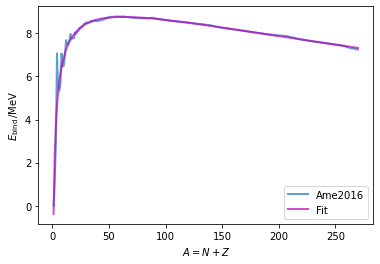

In [5]:
Masses['Eapprox']  = ytilde
# Generate a plot comparing the experimental with the fitted values values.
fig, ax = plt.subplots()
ax.set_xlabel(r'$A = N + Z$')
ax.set_ylabel(r'$E_\mathrm{bind}\,/\mathrm{MeV}$')
ax.plot(Masses['A'], Masses['Ebinding'], alpha=0.7, lw=2,
            label='Ame2016')
ax.plot(Masses['A'], Masses['Eapprox'], alpha=0.7, lw=2, c='m',
            label='Fit')
ax.legend()
save_fig("Masses2016OLS")
plt.show()

## Adding error analysis and training set up

We can easily test our fit by computing the $R2$ score that we discussed in connection with the functionality of **Scikit-Learn** in the introductory slides.
Since we are not using **Scikit-Learn** here we can define our own $R2$ function as

In [6]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

and we would be using it as

In [7]:
print(R2(Energies,ytilde))

0.9547578478889096


We can also add our **MSE** score as

In [8]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print(MSE(Energies,ytilde))

0.037875961483052376


and finally the relative error as

In [9]:
def RelativeError(y_data,y_model):
    return abs((y_data-y_model)/y_data)
print(RelativeError(Energies, ytilde))

A        
1    0            inf
2    1       1.123190
3    2       0.327631
4    6       0.344172
5    9       0.044402
               ...   
264  3304    0.009911
265  3310    0.009154
266  3317    0.007824
269  3338    0.011347
270  3344    0.009790
Name: Ebinding, Length: 267, dtype: float64


## The $\chi^2$ function

Normally, the response (dependent or outcome) variable $y_i$ is the
outcome of a numerical experiment or another type of experiment and is
thus only an approximation to the true value. It is then always
accompanied by an error estimate, often limited to a statistical error
estimate given by the standard deviation discussed earlier. In the
discussion here we will treat $y_i$ as our exact value for the
response variable.

Introducing the standard deviation $\sigma_i$ for each measurement
$y_i$, we define now the $\chi^2$ function (omitting the $1/n$ term)
as

$$
\chi^2(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1}\frac{\left(y_i-\tilde{y}_i\right)^2}{\sigma_i^2}=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\frac{1}{\boldsymbol{\Sigma^2}}\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)\right\},
$$

where the matrix $\boldsymbol{\Sigma}$ is a diagonal matrix with $\sigma_i$ as matrix elements.



## The $\chi^2$ function

In order to find the parameters $\beta_i$ we will then minimize the spread of $\chi^2(\boldsymbol{\beta})$ by requiring

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \frac{1}{n}\sum_{i=0}^{n-1}\left(\frac{y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}}{\sigma_i}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_j} = -\frac{2}{n}\left[ \sum_{i=0}^{n-1}\frac{x_{ij}}{\sigma_i}\left(\frac{y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}}{\sigma_i}\right)\right]=0,
$$

or in a matrix-vector form as

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{A}^T\left( \boldsymbol{b}-\boldsymbol{A}\boldsymbol{\beta}\right).
$$

where we have defined the matrix $\boldsymbol{A} =\boldsymbol{X}/\boldsymbol{\Sigma}$ with matrix elements $a_{ij} = x_{ij}/\sigma_i$ and the vector $\boldsymbol{b}$ with elements $b_i = y_i/\sigma_i$.



## The $\chi^2$ function

We can rewrite

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{A}^T\left( \boldsymbol{b}-\boldsymbol{A}\boldsymbol{\beta}\right),
$$

as

$$
\boldsymbol{A}^T\boldsymbol{b} = \boldsymbol{A}^T\boldsymbol{A}\boldsymbol{\beta},
$$

and if the matrix $\boldsymbol{A}^T\boldsymbol{A}$ is invertible we have the solution

$$
\boldsymbol{\beta} =\left(\boldsymbol{A}^T\boldsymbol{A}\right)^{-1}\boldsymbol{A}^T\boldsymbol{b}.
$$

## The $\chi^2$ function

If we then introduce the matrix

$$
\boldsymbol{H} =  \left(\boldsymbol{A}^T\boldsymbol{A}\right)^{-1},
$$

we have then the following expression for the parameters $\beta_j$ (the matrix elements of $\boldsymbol{H}$ are $h_{ij}$)

$$
\beta_j = \sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}\frac{y_i}{\sigma_i}\frac{x_{ik}}{\sigma_i} = \sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}b_ia_{ik}
$$

We state without proof the expression for the uncertainty  in the parameters $\beta_j$ as (we leave this as an exercise)

$$
\sigma^2(\beta_j) = \sum_{i=0}^{n-1}\sigma_i^2\left( \frac{\partial \beta_j}{\partial y_i}\right)^2,
$$

resulting in

$$
\sigma^2(\beta_j) = \left(\sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}a_{ik}\right)\left(\sum_{l=0}^{p-1}h_{jl}\sum_{m=0}^{n-1}a_{ml}\right) = h_{jj}!
$$

## The $\chi^2$ function
The first step here is to approximate the function $y$ with a first-order polynomial, that is we write

$$
y=y(x) \rightarrow y(x_i) \approx \beta_0+\beta_1 x_i.
$$

By computing the derivatives of $\chi^2$ with respect to $\beta_0$ and $\beta_1$ show that these are given by

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_0} = -2\left[ \frac{1}{n}\sum_{i=0}^{n-1}\left(\frac{y_i-\beta_0-\beta_1x_{i}}{\sigma_i^2}\right)\right]=0,
$$

and

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_1} = -\frac{2}{n}\left[ \sum_{i=0}^{n-1}x_i\left(\frac{y_i-\beta_0-\beta_1x_{i}}{\sigma_i^2}\right)\right]=0.
$$

## The $\chi^2$ function

For a linear fit (a first-order polynomial) we don't need to invert a matrix!!  
Defining

$$
\gamma =  \sum_{i=0}^{n-1}\frac{1}{\sigma_i^2},
$$

$$
\gamma_x =  \sum_{i=0}^{n-1}\frac{x_{i}}{\sigma_i^2},
$$

$$
\gamma_y = \sum_{i=0}^{n-1}\left(\frac{y_i}{\sigma_i^2}\right),
$$

$$
\gamma_{xx} =  \sum_{i=0}^{n-1}\frac{x_ix_{i}}{\sigma_i^2},
$$

$$
\gamma_{xy} = \sum_{i=0}^{n-1}\frac{y_ix_{i}}{\sigma_i^2},
$$

we obtain

$$
\beta_0 = \frac{\gamma_{xx}\gamma_y-\gamma_x\gamma_y}{\gamma\gamma_{xx}-\gamma_x^2},
$$

$$
\beta_1 = \frac{\gamma_{xy}\gamma-\gamma_x\gamma_y}{\gamma\gamma_{xx}-\gamma_x^2}.
$$

This approach (different linear and non-linear regression) suffers
often from both being underdetermined and overdetermined in the
unknown coefficients $\beta_i$.  A better approach is to use the
Singular Value Decomposition (SVD) method discussed below. Or using
Lasso and Ridge regression. See below.



## Regression Examples

## Fitting an Equation of State for Dense Nuclear Matter

Before we continue, let us introduce yet another example. We are going to fit the
nuclear equation of state using results from many-body calculations.
The equation of state we have made available here, as function of
density, has been derived using modern nucleon-nucleon potentials with
[the addition of three-body
interactions](https://www.sciencedirect.com/science/article/pii/S0370157399001106). This
time the file is presented as a standard **csv** file.

The beginning of the Python code here is similar to what you have seen
before, with the same initializations and declarations. We use also
**pandas** again, rather extensively in order to organize our data.

The difference now is that we use **Scikit-Learn's** regression tools
instead of our own matrix inversion implementation. Furthermore, we
sneak in **Ridge** regression (to be discussed below) which includes a
hyperparameter $\lambda$, also to be explained below.

## The code

Mean squared error: 12.36
Variance score: 1.00
Mean absolute error: 2.83
[   0.          618.32047562 -861.13519106 1404.91549644] -11.057088709963296
Mean squared error: 197.93
Variance score: 1.00
Mean absolute error: 11.69
[  0.          28.18220995 282.79902342 842.30879705] 12.946893955209475


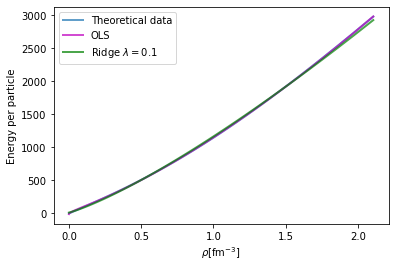

In [10]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops
X = np.zeros((len(Density),4))
X[:,3] = Density**(4.0/3.0)
X[:,2] = Density
X[:,1] = Density**(2.0/3.0)
X[:,0] = 1

# We use now Scikit-Learn's linear regressor and ridge regressor
# OLS part
clf = skl.LinearRegression().fit(X, Energies)
ytilde = clf.predict(X)
EoS['Eols']  = ytilde
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(Energies, ytilde))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(Energies, ytilde))
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(Energies, ytilde))
print(clf.coef_, clf.intercept_)

# The Ridge regression with a hyperparameter lambda = 0.1
_lambda = 0.1
clf_ridge = skl.Ridge(alpha=_lambda).fit(X, Energies)
yridge = clf_ridge.predict(X)
EoS['Eridge']  = yridge
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(Energies, yridge))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(Energies, yridge))
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(Energies, yridge))
print(clf_ridge.coef_, clf_ridge.intercept_)

fig, ax = plt.subplots()
ax.set_xlabel(r'$\rho[\mathrm{fm}^{-3}]$')
ax.set_ylabel(r'Energy per particle')
ax.plot(EoS['Density'], EoS['Energy'], alpha=0.7, lw=2,
            label='Theoretical data')
ax.plot(EoS['Density'], EoS['Eols'], alpha=0.7, lw=2, c='m',
            label='OLS')
ax.plot(EoS['Density'], EoS['Eridge'], alpha=0.7, lw=2, c='g',
            label='Ridge $\lambda = 0.1$')
ax.legend()
save_fig("EoSfitting")
plt.show()

The above simple polynomial in density $\rho$ gives an excellent fit
to the data. 

We note also that there is a small deviation between the
standard OLS and the Ridge regression at higher densities. We discuss this in more detail
below.


## Splitting our Data in Training and Test data

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (sometimes also an additional
validation set).  **Scikit-Learn** has an own function for this. There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data. We will
postpone a discussion of this splitting to the end of these notes and
our discussion of the so-called **bias-variance** tradeoff. Here we
limit ourselves to repeat the above equation of state fitting example
but now splitting the data into a training set and a test set.

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organized into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops
X = np.zeros((len(Density),5))
X[:,0] = 1
X[:,1] = Density**(2.0/3.0)
X[:,2] = Density
X[:,3] = Density**(4.0/3.0)
X[:,4] = Density**(5.0/3.0)
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, Energies, test_size=0.2)
# matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
# and then make the prediction
ytilde = X_train @ beta
print("Training R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))
ypredict = X_test @ beta
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

Training R2
0.9999860376798299
Training MSE
6.857707479444748
Test R2
0.9999833571581862
Test MSE
4.281766530681306


<!-- !split  -->
## The Boston housing data example

The Boston housing  
data set was originally a part of UCI Machine Learning Repository
and has been removed now. The data set is now included in **Scikit-Learn**'s 
library.  There are 506 samples and 13 feature (predictor) variables
in this data set. The objective is to predict the value of prices of
the house using the features (predictors) listed here.

The features/predictors are
1. CRIM: Per capita crime rate by town

2. ZN: Proportion of residential land zoned for lots over 25000 square feet

3. INDUS: Proportion of non-retail business acres per town

4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX: Nitric oxide concentration (parts per 10 million)

6. RM: Average number of rooms per dwelling

7. AGE: Proportion of owner-occupied units built prior to 1940

8. DIS: Weighted distances to five Boston employment centers

9. RAD: Index of accessibility to radial highways

10. TAX: Full-value property tax rate per USD10000

11. B: $1000(Bk - 0.63)^2$, where $Bk$ is the proportion of [people of African American descent] by town

12. LSTAT: Percentage of lower status of the population

13. MEDV: Median value of owner-occupied homes in USD 1000s

## Housing data, the code
We start by importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

and load the Boston Housing DataSet from **Scikit-Learn**

In [ ]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

Then we invoke Pandas

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
boston['MEDV'] = boston_dataset.target

and preprocess the data

In [ ]:
# check for missing values in all the columns
boston.isnull().sum()

We can then visualize the data

In [ ]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=30)
plt.show()

It is now useful to look at the correlation matrix

In [ ]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

From the above coorelation plot we can see that **MEDV** is strongly correlated to **LSTAT** and  **RM**. We see also that **RAD** and **TAX** are stronly correlated, but we don't include this in our features together to avoid multi-colinearity

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Now we start training our model

In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

We split the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

Then we use the linear regression functionality from **Scikit-Learn**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

## Reducing the number of degrees of freedom, overarching view

Many Machine Learning problems involve thousands or even millions of
features for each training instance. Not only does this make training
extremely slow, it can also make it much harder to find a good
solution, as we will see. This problem is often referred to as the
curse of dimensionality.  Fortunately, in real-world problems, it is
often possible to reduce the number of features considerably, turning
an intractable problem into a tractable one.

Later  we will discuss some of the most popular dimensionality reduction
techniques: the principal component analysis (PCA), Kernel PCA, and
Locally Linear Embedding (LLE).  


Principal component analysis and its various variants deal with the
problem of fitting a low-dimensional [affine
subspace](https://en.wikipedia.org/wiki/Affine_space) to a set of of
data points in a high-dimensional space. With its family of methods it
is one of the most used tools in data modeling, compression and
visualization.




## Preprocessing our data


Before we proceed however, we will discuss how to preprocess our
data. Till now and in connection with our previous examples we have
not met so many cases where we are too sensitive to the scaling of our
data. Normally the data may need a rescaling and/or may be sensitive
to extreme values. Scaling the data renders our inputs much more
suitable for the algorithms we want to employ.

**Scikit-Learn** has several functions which allow us to rescale the
data, normally resulting in much better results in terms of various
accuracy scores.  The **StandardScaler** function in **Scikit-Learn**
ensures that for each feature/predictor we study the mean value is
zero and the variance is one (every column in the design/feature
matrix).  This scaling has the drawback that it does not ensure that
we have a particular maximum or minimum in our data set. Another
function included in **Scikit-Learn** is the **MinMaxScaler** which
ensures that all features are exactly between $0$ and $1$. The

## More preprocessing


The **Normalizer** scales each data
point such that the feature vector has a euclidean length of one. In other words, it
projects a data point on the circle (or sphere in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of it’s length).
This normalization is often used when only the direction (or angle) of the data matters,
not the length of the feature vector.

The **RobustScaler** works similarly to the StandardScaler in that it
ensures statistical properties for each feature that guarantee that
they are on the same scale. However, the RobustScaler uses the median
and quartiles, instead of mean and variance. This makes the
RobustScaler ignore data points that are very different from the rest
(like measurement errors). These odd data points are also called
outliers, and might often lead to trouble for other scaling
techniques.



## Simple preprocessing examples, Franke function and regression

In [ ]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4


def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X


# Making meshgrid of datapoints and compute Franke's function
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X = create_X(x, y, n=n)    
# split in training and test data
X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)


clf = skl.LinearRegression().fit(X_train, y_train)

# The mean squared error and R2 score
print("MSE before scaling: {:.2f}".format(mean_squared_error(clf.predict(X_test), y_test)))
print("R2 score before scaling {:.2f}".format(clf.score(X_test,y_test)))

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature min values before scaling:\n {}".format(X_train.min(axis=0)))
print("Feature max values before scaling:\n {}".format(X_train.max(axis=0)))

print("Feature min values after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("Feature max values after scaling:\n {}".format(X_train_scaled.max(axis=0)))

clf = skl.LinearRegression().fit(X_train_scaled, y_train)


print("MSE after  scaling: {:.2f}".format(mean_squared_error(clf.predict(X_test_scaled), y_test)))
print("R2 score for  scaled data: {:.2f}".format(clf.score(X_test_scaled,y_test)))

## Singular Value Decomposition Algorithm



## The singular value decomposition


The examples we have looked at so far are cases where we normally can
invert the matrix $\boldsymbol{X}^T\boldsymbol{X}$. Using a polynomial expansion as we
did both for the masses and the fitting of the equation of state,
leads to row vectors of the design matrix which are essentially
orthogonal due to the polynomial character of our model. Obtaining the inverse of the design matrix is then often done via a so-called LU, QR or Cholesky decomposition. 



This may
however not the be case in general and a standard matrix inversion
algorithm based on say LU, QR or Cholesky decomposition may lead to singularities. We will see examples of this below.

There is however a way to partially circumvent this problem and also gain some insight about the ordinary least squares approach. 

This is given by the **Singular Value Decomposition** algorithm, perhaps
the most powerful linear algebra algorithm.  Let us look at a
different example where we may have problems with the standard matrix
inversion algorithm. Thereafter we dive into the math of the SVD.





## Linear Regression Problems

One of the typical problems we encounter with linear regression, in particular 
when the matrix $\boldsymbol{X}$ (our so-called design matrix) is high-dimensional, 
are problems with near singular or singular matrices. The column vectors of $\boldsymbol{X}$ 
may be linearly dependent, normally referred to as super-collinearity.  
This means that the matrix may be rank deficient and it is basically impossible to 
to model the data using linear regression. As an example, consider the matrix

$$
\begin{align*}
\mathbf{X} & =  \left[
\begin{array}{rrr}
1 & -1 & 2
\\
1 & 0 & 1
\\
1 & 2  & -1
\\
1 & 1  & 0
\end{array} \right]
\end{align*}
$$

The columns of $\boldsymbol{X}$ are linearly dependent. We see this easily since the 
the first column is the row-wise sum of the other two columns. The rank (more correct,
the column rank) of a matrix is the dimension of the space spanned by the
column vectors. Hence, the rank of $\mathbf{X}$ is equal to the number
of linearly independent columns. In this particular case the matrix has rank 2.

Super-collinearity of an $(n \times p)$-dimensional design matrix $\mathbf{X}$ implies
that the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$ (the matrix we need to invert to solve the linear regression equations) is non-invertible. If we have a square matrix that does not have an inverse, we say this matrix singular. The example here demonstrates this

$$
\begin{align*}
\boldsymbol{X} & =  \left[
\begin{array}{rr}
1 & -1
\\
1 & -1
\end{array} \right].
\end{align*}
$$

We see easily that  $\mbox{det}(\boldsymbol{X}) = x_{11} x_{22} - x_{12} x_{21} = 1 \times (-1) - 1 \times (-1) = 0$. Hence, $\mathbf{X}$ is singular and its inverse is undefined.
This is equivalent to saying that the matrix $\boldsymbol{X}$ has at least an eigenvalue which is zero.


## Fixing the singularity

If our design matrix $\boldsymbol{X}$ which enters the linear regression problem

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\boldsymbol{\beta}  =  (\boldsymbol{X}^{T} \boldsymbol{X})^{-1} \boldsymbol{X}^{T} \boldsymbol{y},
\label{_auto1} \tag{1}
\end{equation}
$$

has linearly dependent column vectors, we will not be able to compute the inverse
of $\boldsymbol{X}^T\boldsymbol{X}$ and we cannot find the parameters (estimators) $\beta_i$. 
The estimators are only well-defined if $(\boldsymbol{X}^{T}\boldsymbol{X})^{-1}$ exits. 
This is more likely to happen when the matrix $\boldsymbol{X}$ is high-dimensional. In this case it is likely to encounter a situation where 
the regression parameters $\beta_i$ cannot be estimated.

A cheap  *ad hoc* approach is  simply to add a small diagonal component to the matrix to invert, that is we change

$$
\boldsymbol{X}^{T} \boldsymbol{X} \rightarrow \boldsymbol{X}^{T} \boldsymbol{X}+\lambda \boldsymbol{I},
$$

where $\boldsymbol{I}$ is the identity matrix.  When we discuss **Ridge** regression this is actually what we end up evaluating. The parameter $\lambda$ is called a hyperparameter. More about this later. 



## Basic math of the SVD


From standard linear algebra we know that a square matrix $\boldsymbol{X}$ can be diagonalized if and only it is 
a so-called [normal matrix](https://en.wikipedia.org/wiki/Normal_matrix), that is if $\boldsymbol{X}\in {\mathbb{R}}^{n\times n}$
we have $\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ or if $\boldsymbol{X}\in {\mathbb{C}}^{n\times n}$ we have $\boldsymbol{X}\boldsymbol{X}^{\dagger}=\boldsymbol{X}^{\dagger}\boldsymbol{X}$.
The matrix has then a set of eigenpairs

$$
(\lambda_1,\boldsymbol{u}_1),\dots, (\lambda_n,\boldsymbol{u}_n),
$$

and the eigenvalues are given by the diagonal matrix

$$
\boldsymbol{\Sigma}=\mathrm{Diag}(\lambda_1, \dots,\lambda_n).
$$

The matrix $\boldsymbol{X}$ can be written in terms of an orthogonal/unitary transformation $\boldsymbol{U}$

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with $\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{I}$ or $\boldsymbol{U}\boldsymbol{U}^{\dagger}=\boldsymbol{I}$.

Not all square matrices are diagonalizable. A matrix like the one discussed above

$$
\boldsymbol{X} = \begin{bmatrix} 
1&  -1 \\
1& -1\\
\end{bmatrix}
$$

is not diagonalizable, it is a so-called [defective matrix](https://en.wikipedia.org/wiki/Defective_matrix). It is easy to see that the condition
$\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ is not fulfilled. 


## The SVD, a Fantastic Algorithm


However, and this is the strength of the SVD algorithm, any general
matrix $\boldsymbol{X}$ can be decomposed in terms of a diagonal matrix and
two orthogonal/unitary matrices.  The [Singular Value Decompostion
(SVD) theorem](https://en.wikipedia.org/wiki/Singular_value_decomposition)
states that a general $m\times n$ matrix $\boldsymbol{X}$ can be written in
terms of a diagonal matrix $\boldsymbol{\Sigma}$ of dimensionality $n\times n$
and two orthognal matrices $\boldsymbol{U}$ and $\boldsymbol{V}$, where the first has
dimensionality $m \times m$ and the last dimensionality $n\times n$.
We have then

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
$$

As an example, the above defective matrix can be decomposed as

$$
\boldsymbol{X} = \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  1 \\ 1& -1\\ \end{bmatrix} \begin{bmatrix}  2&  0 \\ 0& 0\\ \end{bmatrix}    \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  -1 \\ 1& 1\\ \end{bmatrix}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with eigenvalues $\sigma_1=2$ and $\sigma_2=0$. 
The SVD exits always! 


## Another Example

Consider the following matrix which can be SVD decomposed as

$$
\boldsymbol{X} = \frac{1}{15}\begin{bmatrix} 14 & 2\\ 4 & 22\\ 16 & 13\end{bmatrix}=\frac{1}{3}\begin{bmatrix}  1&  2 & 2 \\ 2& -1 & 1\\ 2 & 1& -2\end{bmatrix} \begin{bmatrix}  2&  0 \\ 0& 1\\ 0 & 0\end{bmatrix}\frac{1}{5}\begin{bmatrix}  3&  4 \\ 4& -3\end{bmatrix}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

This is a $3\times 2$ matrix which is decomposed in terms of a
$3\times 3$ matrix $\boldsymbol{U}$, and a $2\times 2$ matrix $\boldsymbol{V}$. It is easy to see
that $\boldsymbol{U}$ and $\boldsymbol{V}$ are orthogonal (how?). 

And the SVD
decomposition (singular values) gives eigenvalues 
$\sigma_i\geq\sigma_{i+1}$ for all $i$ and for dimensions larger than $i=2$, the
eigenvalues (singular values) are zero.

In the general case, where our design matrix $\boldsymbol{X}$ has dimension
$n\times p$, the matrix is thus decomposed into an $n\times n$
orthogonal matrix $\boldsymbol{U}$, a $p\times p$ orthogonal matrix $\boldsymbol{V}$
and a diagonal matrix $\boldsymbol{\Sigma}$ with $r=\mathrm{min}(n,p)$
singular values $\sigma_i\geq 0$ on the main diagonal and zeros filling
the rest of the matrix.  There are at most $p$ singular values
assuming that $n > p$. In our regression examples for the nuclear
masses and the equation of state this is indeed the case, while for
the Ising model we have $p > n$. These are often cases that lead to
near singular or singular matrices.

The columns of $\boldsymbol{U}$ are called the left singular vectors while the columns of $\boldsymbol{V}$ are the right singular vectors.

## Economy-size SVD

If we assume that $n > p$, then our matrix $\boldsymbol{U}$ has dimension $n
\times n$. The last $n-p$ columns of $\boldsymbol{U}$ become however
irrelevant in our calculations since they are multiplied with the
zeros in $\boldsymbol{\Sigma}$.

The economy-size decomposition removes extra rows or columns of zeros
from the diagonal matrix of singular values, $\boldsymbol{\Sigma}$, along with the columns
in either $\boldsymbol{U}$ or $\boldsymbol{V}$ that multiply those zeros in the expression. 
Removing these zeros and columns can improve execution time
and reduce storage requirements without compromising the accuracy of
the decomposition.

If $n > p$, we keep only the first $p$ columns of $\boldsymbol{U}$ and $\boldsymbol{\Sigma}$ has dimension $p\times p$. 
If $p > n$, then only the first $n$ columns of $\boldsymbol{V}$ are computed and $\boldsymbol{\Sigma}$ has dimension $n\times n$.
The $n=p$ case is obvious, we retain the full SVD. 
In general the economy-size SVD leads to less FLOPS and still conserving the desired accuracy.

## Codes for the SVD

In [ ]:
import numpy as np
# SVD inversion
def SVDinv(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, s, VT = np.linalg.svd(A)
#    print('test U')
#    print( (np.transpose(U) @ U - U @np.transpose(U)))
#    print('test VT')
#    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))
    print(U)
    print(s)
    print(VT)

    D = np.zeros((len(U),len(VT)))
    for i in range(0,len(VT)):
        D[i,i]=s[i]
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))


X = np.array([ [1.0, -1.0, 2.0], [1.0, 0.0, 1.0], [1.0, 2.0, -1.0], [1.0, 1.0, 0.0] ])
print(X)
A = np.transpose(X) @ X
print(A)
# Brute force inversion of super-collinear matrix
B = np.linalg.inv(A)
print(B)
C = SVDinv(A)
print(C)

The matrix $\boldsymbol{X}$ has columns that are linearly dependent. The first
column is the row-wise sum of the other two columns. The rank of a
matrix (the column rank) is the dimension of space spanned by the
column vectors. The rank of the matrix is the number of linearly
independent columns, in this case just $2$. We see this from the
singular values when running the above code. Running the standard
inversion algorithm for matrix inversion with $\boldsymbol{X}^T\boldsymbol{X}$ results
in the program terminating due to a singular matrix.



## Mathematical Properties

There are several interesting mathematical properties which will be
relevant when we are going to discuss the differences between say
ordinary least squares (OLS) and **Ridge** regression.

We have from OLS that the parameters of the linear approximation are given by

$$
\boldsymbol{\tilde{y}} = \boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

The matrix to invert can be rewritten in terms of our SVD decomposition as

$$
\boldsymbol{X}^T\boldsymbol{X} = \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

Using the orthogonality properties of $\boldsymbol{U}$ we have

$$
\boldsymbol{X}^T\boldsymbol{X} = \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T =  \boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T,
$$

with $\boldsymbol{D}$ being a diagonal matrix with values along the diagonal given by the singular values squared. 

This means that

$$
(\boldsymbol{X}^T\boldsymbol{X})\boldsymbol{V} = \boldsymbol{V}\boldsymbol{D},
$$

that is the eigenvectors of $(\boldsymbol{X}^T\boldsymbol{X})$ are given by the columns of the right singular matrix of $\boldsymbol{X}$ and the eigenvalues are the squared singular values.  It is easy to show (show this) that

$$
(\boldsymbol{X}\boldsymbol{X}^T)\boldsymbol{U} = \boldsymbol{U}\boldsymbol{D},
$$

that is, the eigenvectors of $(\boldsymbol{X}\boldsymbol{X})^T$ are the columns of the left singular matrix and the eigenvalues are the same. 

Going back to our OLS equation we have

$$
\boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{X}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}.
$$

We will come back to this expression when we discuss Ridge regression. 



## Beyond Ordinary Least Squares


## Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. By defining

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

## More on Ridge Regression

Using the matrix-vector expression for Ridge regression (we drop the $1/n$ factor),

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

by taking the derivatives with respect to $\boldsymbol{\beta}$ we obtain

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = 2\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)-2\lambda\boldsymbol{\beta}.
$$

We obtain 
a slightly modified matrix inversion problem which for finite values
of $\lambda$ does not suffer from singularity problems, that is

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number. 

We see that Ridge regression is nothing but the standard
OLS with a modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The
consequences, in particular for our discussion of the bias-variance tradeoff 
are rather interesting.

Furthermore, if we use the result above in terms of the SVD decomposition (our analysis was done for the OLS method), we get

$$
(\boldsymbol{X}\boldsymbol{X}^T)\boldsymbol{U} = \boldsymbol{U}\boldsymbol{D}.
$$

We can  analyse the OLS solutions in terms of the eigenvectors (the columns) of the right singular value matrix $\boldsymbol{U}$ as

$$
\boldsymbol{X}\boldsymbol{\beta} = \boldsymbol{X}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}
$$

For Ridge regression this becomes

$$
\boldsymbol{X}\boldsymbol{\beta}^{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$. 

## Interpreting the Ridge results

Since $\lambda \geq 0$, it means that compared to OLS, we have

$$
\frac{\sigma_j^2}{\sigma_j^2+\lambda} \leq 1.
$$

Ridge regression finds the coordinates of $\boldsymbol{y}$ with respect to the
orthonormal basis $\boldsymbol{U}$, it then shrinks the coordinates by
$\frac{\sigma_j^2}{\sigma_j^2+\lambda}$. Recall that the SVD has
eigenvalues ordered in a descending way, that is $\sigma_i \geq
\sigma_{i+1}$.

For small eigenvalues $\sigma_i$ it means that their contributions become less important, a fact which can be used to reduce the number of degrees of freedom.
Actually, calculating the variance of $\boldsymbol{X}\boldsymbol{v}_j$ shows that this quantity is equal to $\sigma_j^2/n$.
With a parameter $\lambda$ we can thus shrink the role of specific parameters.  


## More interpretations

For the sake of simplicity, let us assume that the design matrix is orthonormal, that is

$$
\boldsymbol{X}^T\boldsymbol{X}=(\boldsymbol{X}^T\boldsymbol{X})^{-1} =\boldsymbol{I}.
$$

In this case the standard OLS results in

$$
\boldsymbol{\beta}^{\mathrm{OLS}} = \boldsymbol{X}^T\boldsymbol{y}=\sum_{i=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y},
$$

and

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\beta}^{\mathrm{OLS}},
$$

that is the Ridge estimator scales the OLS estimator by the inverse of a factor $1+\lambda$, and
the Ridge estimator converges to zero when the hyperparameter goes to
infinity.

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.


## Statistics


## Where are we going?

Before we proceed, we need to rethink what we have been doing. In our
eager to fit the data, we have omitted several important elements in
our regression analysis. In what follows we will
1. remind ourselves about some statistical properties, including a discussion of mean values, variance and the so-called bias-variance tradeoff

2. introduce resampling techniques like cross-validation, bootstrapping and jackknife and more

This will allow us to link the standard linear algebra methods we have discussed above to a statistical interpretation of the methods. 





## Resampling methods
Resampling methods are an indispensable tool in modern
statistics. They involve repeatedly drawing samples from a training
set and refitting a model of interest on each sample in order to
obtain additional information about the fitted model. For example, in
order to estimate the variability of a linear regression fit, we can
repeatedly draw different samples from the training data, fit a linear
regression to each new sample, and then examine the extent to which
the resulting fits differ. Such an approach may allow us to obtain
information that would not be available from fitting the model only
once using the original training sample.

Two resampling methods are often used in Machine Learning analyses,
1. The **bootstrap method**

2. and **Cross-Validation**

In addition there are several other methods such as the Jackknife and the Blocking methods. We will discuss in particular
cross-validation and the bootstrap method.




## Resampling approaches can be computationally expensive

Resampling approaches can be computationally expensive, because they
involve fitting the same statistical method multiple times using
different subsets of the training data. However, due to recent
advances in computing power, the computational requirements of
resampling methods generally are not prohibitive. In this chapter, we
discuss two of the most commonly used resampling methods,
cross-validation and the bootstrap. Both methods are important tools
in the practical application of many statistical learning
procedures. For example, cross-validation can be used to estimate the
test error associated with a given statistical learning method in
order to evaluate its performance, or to select the appropriate level
of flexibility. The process of evaluating a model’s performance is
known as model assessment, whereas the process of selecting the proper
level of flexibility for a model is known as model selection. The
bootstrap is widely used.



## Why resampling methods ?
**Statistical analysis.**


* Our simulations can be treated as *computer experiments*. This is particularly the case for Monte Carlo methods

* The results can be analysed with the same statistical tools as we would use analysing experimental data.

* As in all experiments, we are looking for expectation values and an estimate of how accurate they are, i.e., possible sources for errors.

    

## Statistical analysis

* As in other experiments, many numerical  experiments have two classes of errors:

  * Statistical errors

  * Systematical errors


* Statistical errors can be estimated using standard tools from statistics

* Systematical errors are method specific and must be treated differently from case to case.

    



<!-- !split  -->
## Linking the regression analysis with a statistical interpretation

We are going to discuss several statistical properties which can be obtained in terms of analytical expressions. 
The
advantage of doing linear regression is that we actually end up with
analytical expressions for several statistical quantities.  
Standard least squares and Ridge regression  allow us to
derive quantities like the variance and other expectation values in a
rather straightforward way.


It is assumed that $\varepsilon_i
\sim \mathcal{N}(0, \sigma^2)$ and the $\varepsilon_{i}$ are
independent, i.e.:

$$
\begin{align*} 
\mbox{Cov}(\varepsilon_{i_1},
\varepsilon_{i_2}) & = \left\{ \begin{array}{lcc} \sigma^2 & \mbox{if}
& i_1 = i_2, \\ 0 & \mbox{if} & i_1 \not= i_2.  \end{array} \right.
\end{align*}
$$

The randomness of $\varepsilon_i$ implies that
$\mathbf{y}_i$ is also a random variable. In particular,
$\mathbf{y}_i$ is normally distributed, because $\varepsilon_i \sim
\mathcal{N}(0, \sigma^2)$ and $\mathbf{X}_{i,\ast} \, \boldsymbol{\beta}$ is a
non-random scalar. To specify the parameters of the distribution of
$\mathbf{y}_i$ we need to calculate its first two moments. 

Recall that $\boldsymbol{X}$ is a matrix of dimensionality $n\times p$. The
notation above $\mathbf{X}_{i,\ast}$ means that we are looking at the
row number $i$ and perform a sum over all values $p$.


## Assumptions made

The assumption we have made here can be summarized as (and this is going to be useful when we discuss the bias-variance trade off)
that there exists a function $f(\boldsymbol{x})$ and  a normal distributed error $\boldsymbol{\varepsilon}\sim \mathcal{N}(0, \sigma^2)$
which describe our data

$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$

We approximate this function with our model from the solution of the linear regression equations, that is our
function $f$ is approximated by $\boldsymbol{\tilde{y}}$ where we want to minimize $(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2$, our MSE, with

$$
\boldsymbol{\tilde{y}} = \boldsymbol{X}\boldsymbol{\beta}\approx f(\boldsymbol{x}).
$$

Note that we reserve the design matrix $\boldsymbol{X}$ to represent our specific rewrite of the input variables $\boldsymbol{x}$.



## Expectation value and variance

We can calculate the expectation value of $\boldsymbol{y}$ for a given element $i$

$$
\begin{align*} 
\mathbb{E}(y_i) & =
\mathbb{E}(\mathbf{X}_{i, \ast} \, \boldsymbol{\beta}) + \mathbb{E}(\varepsilon_i)
\, \, \, = \, \, \, \mathbf{X}_{i, \ast} \, \beta, 
\end{align*}
$$

while
its variance is

$$
\begin{align*} \mbox{Var}(y_i) & = \mathbb{E} \{ [y_i
- \mathbb{E}(y_i)]^2 \} \, \, \, = \, \, \, \mathbb{E} ( y_i^2 ) -
[\mathbb{E}(y_i)]^2  \\  & = \mathbb{E} [ ( \mathbf{X}_{i, \ast} \,
\beta + \varepsilon_i )^2] - ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 \\ &
= \mathbb{E} [ ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 + 2 \varepsilon_i
\mathbf{X}_{i, \ast} \, \boldsymbol{\beta} + \varepsilon_i^2 ] - ( \mathbf{X}_{i,
\ast} \, \beta)^2 \\  & = ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 + 2
\mathbb{E}(\varepsilon_i) \mathbf{X}_{i, \ast} \, \boldsymbol{\beta} +
\mathbb{E}(\varepsilon_i^2 ) - ( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta})^2 
\\ & = \mathbb{E}(\varepsilon_i^2 ) \, \, \, = \, \, \,
\mbox{Var}(\varepsilon_i) \, \, \, = \, \, \, \sigma^2.  
\end{align*}
$$

Hence, $y_i \sim \mathcal{N}( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, that is $\boldsymbol{y}$ follows a normal distribution with 
mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$ (not be confused with the singular values of the SVD). 

## Expectation value and variance for $\boldsymbol{\beta}$

With the OLS expressions for the parameters $\boldsymbol{\beta}$ we can evaluate the expectation value

$$
\mathbb{E}(\boldsymbol{\beta}) = \mathbb{E}[ (\mathbf{X}^{\top} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbf{Y}]=(\mathbf{X}^{T} \mathbf{X})^{-1}\mathbf{X}^{T} \mathbb{E}[ \mathbf{Y}]=(\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T}\mathbf{X}\boldsymbol{\beta}=\boldsymbol{\beta}.
$$

This means that the estimator of the regression parameters is unbiased.

We can also calculate the variance

The variance of $\boldsymbol{\beta}$ is

$$
\begin{eqnarray*}
\mbox{Var}(\boldsymbol{\beta}) & = & \mathbb{E} \{ [\boldsymbol{\beta} - \mathbb{E}(\boldsymbol{\beta})] [\boldsymbol{\beta} - \mathbb{E}(\boldsymbol{\beta})]^{T} \}
\\
& = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} - \boldsymbol{\beta}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} - \boldsymbol{\beta}]^{T} \}
\\
% & = & \mathbb{E} \{ [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y}] \, [(\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y}]^{T} \} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
% & = & \mathbb{E} \{ (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \mathbf{Y} \, \mathbf{Y}^{T} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1}  \} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \mathbb{E} \{ \mathbf{Y} \, \mathbf{Y}^{T} \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
\\
& = & (\mathbf{X}^{T} \mathbf{X})^{-1} \, \mathbf{X}^{T} \, \{ \mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^{T} \,  \mathbf{X}^{T} + \sigma^2 \} \, \mathbf{X} \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
% \\
% & = & (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T \, \mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^T \,  \mathbf{X}^T \, \mathbf{X} \, (\mathbf{X}^T % \mathbf{X})^{-1}
% \\
% & & + \, \, \sigma^2 \, (\mathbf{X}^T \mathbf{X})^{-1} \, \mathbf{X}^T  \, \mathbf{X} \, (\mathbf{X}^T \mathbf{X})^{-1} - \boldsymbol{\beta} \boldsymbol{\beta}^T
\\
& = & \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}  + \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1} - \boldsymbol{\beta} \, \boldsymbol{\beta}^{T}
\, \, \, = \, \, \, \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1},
\end{eqnarray*}
$$

where we have used  that $\mathbb{E} (\mathbf{Y} \mathbf{Y}^{T}) =
\mathbf{X} \, \boldsymbol{\beta} \, \boldsymbol{\beta}^{T} \, \mathbf{X}^{T} +
\sigma^2 \, \mathbf{I}_{nn}$. From $\mbox{Var}(\boldsymbol{\beta}) = \sigma^2
\, (\mathbf{X}^{T} \mathbf{X})^{-1}$, one obtains an estimate of the
variance of the estimate of the $j$-th regression coefficient:
$\boldsymbol{\sigma}^2 (\hat{\beta}_j ) = \boldsymbol{\sigma}^2 \sqrt{
[(\mathbf{X}^{T} \mathbf{X})^{-1}]_{jj} }$. This may be used to
construct a confidence interval for the estimates.


In a similar way, we can obtain analytical expressions for say the
expectation values of the parameters $\boldsymbol{\beta}$ and their variance
when we employ Ridge regression, allowing us again to define a confidence interval. 

It is rather straightforward to show that

$$
\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}^{\mathrm{OLS}}.
$$

We see clearly that 
$\mathbb{E} \big[ \boldsymbol{\beta}^{\mathrm{Ridge}} \big] \not= \boldsymbol{\beta}^{\mathrm{OLS}}$ for any $\lambda > 0$. We say then that the ridge estimator is biased.

We can also compute the variance as

$$
\mbox{Var}[\boldsymbol{\beta}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T} \mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T},
$$

and it is easy to see that if the parameter $\lambda$ goes to infinity then the variance of Ridge parameters $\boldsymbol{\beta}$ goes to zero. 

With this, we can compute the difference

$$
\mbox{Var}[\boldsymbol{\beta}^{\mathrm{OLS}}]-\mbox{Var}(\boldsymbol{\beta}^{\mathrm{Ridge}})=\sigma^2 [  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}[ 2\lambda\mathbf{I} + \lambda^2 (\mathbf{X}^{T} \mathbf{X})^{-1} ] \{ [  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}.
$$

The difference is non-negative definite since each component of the
matrix product is non-negative definite. 
This means the variance we obtain with the standard OLS will always for $\lambda > 0$ be larger than the variance of $\boldsymbol{\beta}$ obtained with the Ridge estimator. This has interesting consequences when we discuss the so-called bias-variance trade-off tomorrow.